## Imports

In [1]:
from data.Data import Data

from NaiveBayes import NaiveBayes
from RandomModel import RandomModel
from NeuralNetwork import NeuralNetwork
from XGBoost import XGBoost
from RandomForest import RandomForest
from SupportVectorMachine import SupportVectorMachine

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from math import ceil

## Cutoff for ROC calculation

In [2]:
CUTOFFS = np.arange(0, 1, 0.02)

## Data

In [3]:
df = pd.read_csv('./data/breast-cancer.data')
df.head()

data = Data(df)

train, eval = data.get_train_and_valid_set(0.7)

train_x = train.drop('class', axis=1)
train_y = train['class']

eval_x = eval.drop('class', axis=1)
eval_y = eval['class']

## Models

In [4]:
models = [
    RandomModel(),
    NaiveBayes(),
    NeuralNetwork(),
    RandomForest(),
    XGBoost(),
    SupportVectorMachine()
]

## Calculate models metrics

In [5]:
for model in models:
    model.fit(train_x, train_y)
    preds = model.predict(eval_x)
    model.calculate_quality(np.array(eval_y), preds)

0 tensor(0.0060, grad_fn=<DivBackward0>)
1 tensor(0.0041, grad_fn=<DivBackward0>)
2 tensor(0.0057, grad_fn=<DivBackward0>)
3 tensor(0.0043, grad_fn=<DivBackward0>)
4 tensor(0.0042, grad_fn=<DivBackward0>)
5 tensor(0.0045, grad_fn=<DivBackward0>)
6 tensor(0.0038, grad_fn=<DivBackward0>)
7 tensor(0.0035, grad_fn=<DivBackward0>)
8 tensor(0.0032, grad_fn=<DivBackward0>)
9 tensor(0.0038, grad_fn=<DivBackward0>)
10 tensor(0.0026, grad_fn=<DivBackward0>)
11 tensor(0.0037, grad_fn=<DivBackward0>)
12 tensor(0.0034, grad_fn=<DivBackward0>)
13 tensor(0.0026, grad_fn=<DivBackward0>)
14 tensor(0.0039, grad_fn=<DivBackward0>)
15 tensor(0.0041, grad_fn=<DivBackward0>)
16 tensor(0.0034, grad_fn=<DivBackward0>)
17 tensor(0.0031, grad_fn=<DivBackward0>)
18 tensor(0.0037, grad_fn=<DivBackward0>)
19 tensor(0.0029, grad_fn=<DivBackward0>)
20 tensor(0.0033, grad_fn=<DivBackward0>)
21 tensor(0.0037, grad_fn=<DivBackward0>)
22 tensor(0.0032, grad_fn=<DivBackward0>)
23 tensor(0.0029, grad_fn=<DivBackward0>)
24

c:\Users\hrzon\anaconda3\envs\ssne-env-python-3-7\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


## Results

In [6]:
for model in models:
    print(model)

BinaryClassificationModel: RandomModel
Confusion Matrix: 
[[12 34]
 [14 26]]
Accuracy: 0.4418604651162791
Recall(also known as Sensitivity): 0.46153846153846156
Specificity: 0.43333333333333335
Precision: 0.2608695652173913
F1 Score: 0.33333333333333337
Support: 26

BinaryClassificationModel: NaiveBayes
Confusion Matrix: 
[[ 9  9]
 [17 51]]
Accuracy: 0.6976744186046512
Recall(also known as Sensitivity): 0.34615384615384615
Specificity: 0.85
Precision: 0.5
F1 Score: 0.40909090909090906
Support: 26

BinaryClassificationModel: NeuralNetwork
Confusion Matrix: 
[[10 17]
 [16 43]]
Accuracy: 0.6162790697674418
Recall(also known as Sensitivity): 0.38461538461538464
Specificity: 0.7166666666666667
Precision: 0.37037037037037035
F1 Score: 0.3773584905660377
Support: 26

BinaryClassificationModel: RandomForest
Confusion Matrix: 
[[ 5  8]
 [21 52]]
Accuracy: 0.6627906976744186
Recall(also known as Sensitivity): 0.19230769230769232
Specificity: 0.8666666666666667
Precision: 0.38461538461538464
F1 S

## Results

### ROC curves

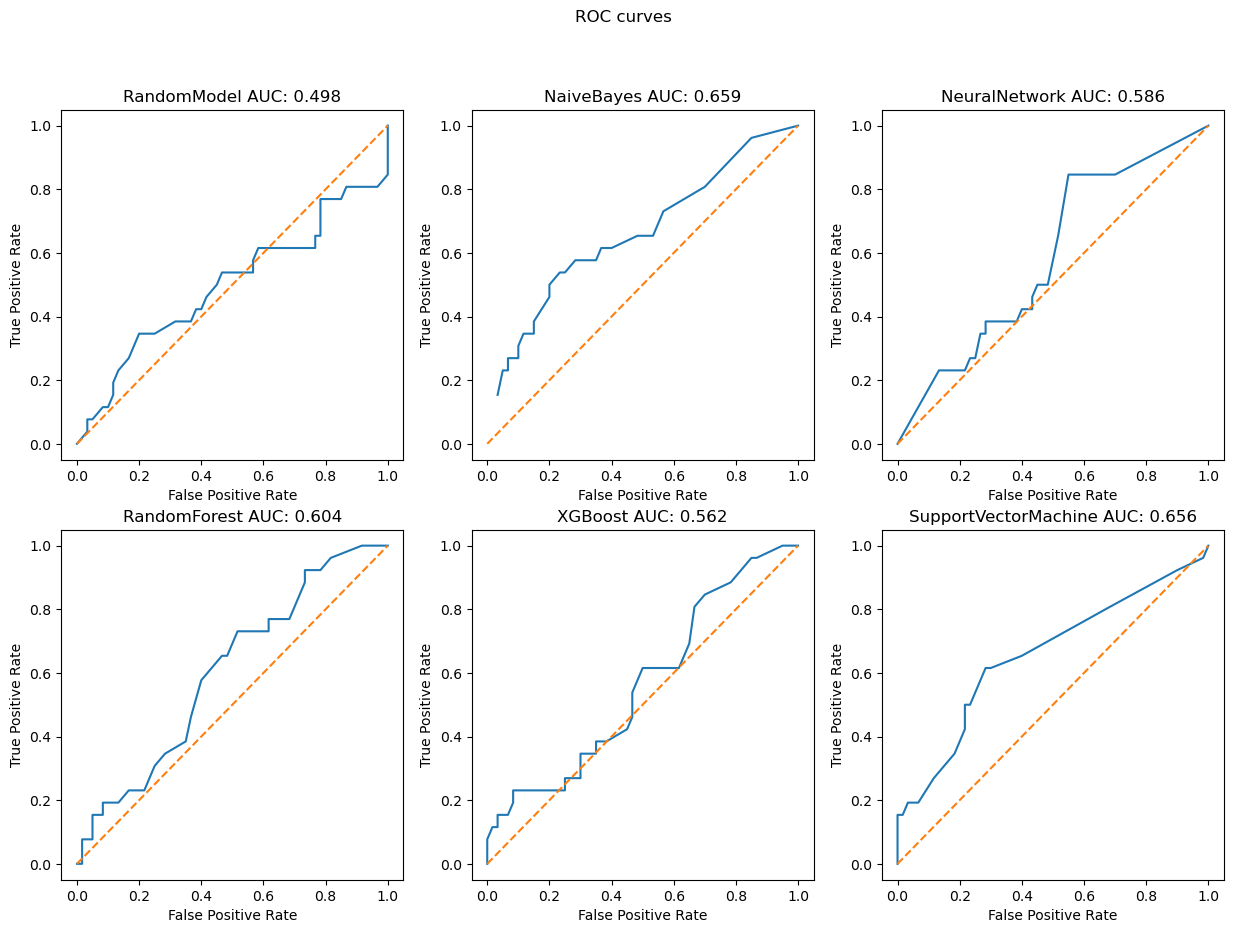

In [7]:
fig, axs = plt.subplots(2, ceil(len(models)/2))
fig.set_figheight(10)
fig.set_figwidth(15)
fig.suptitle('ROC curves')
for model, ax in zip(models, axs.flatten()):
    preds = model.predict(eval_x)
    model.plot_roc_curve(ax, np.array(eval_y), preds, CUTOFFS)
plt.show()

### Confusion Matrices

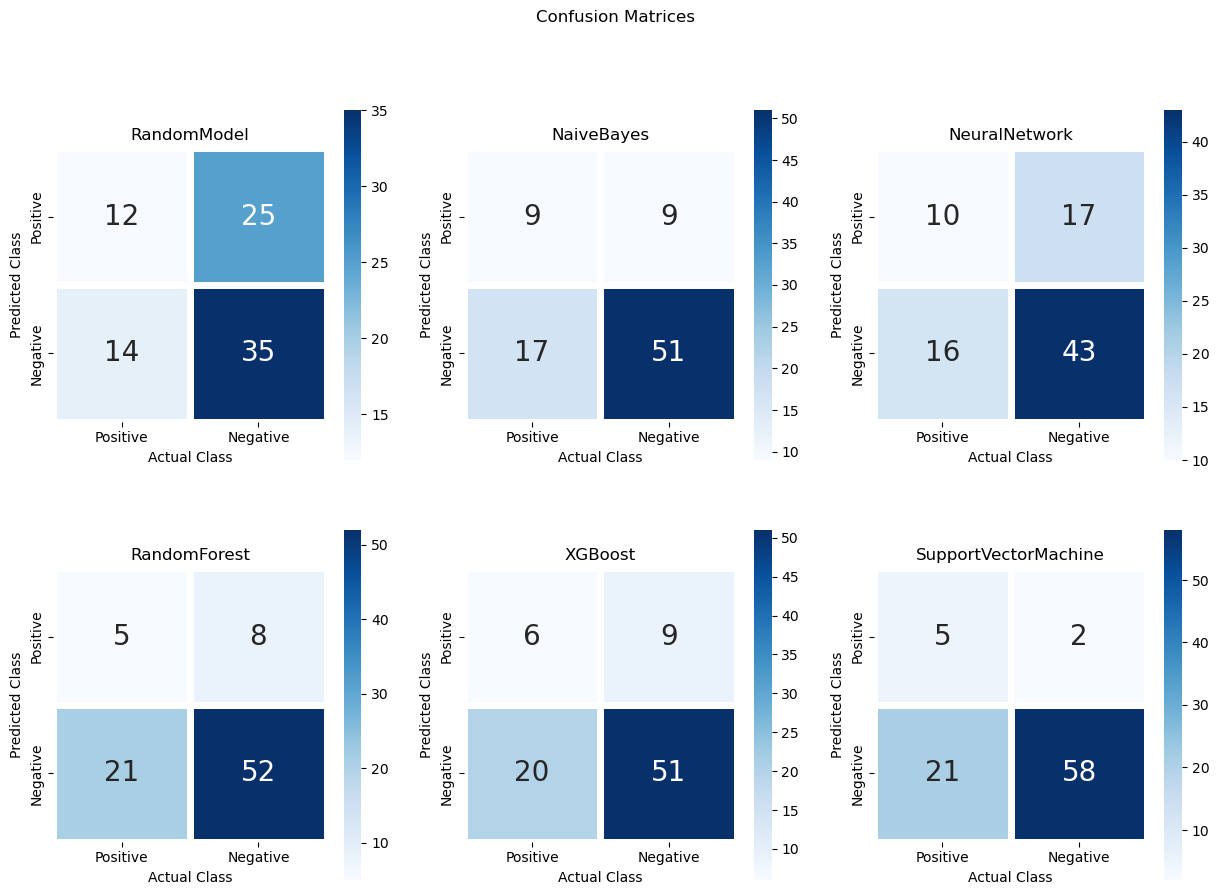

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [8]:
fig, axs = plt.subplots(2, ceil(len(models)/2))
fig.set_figheight(10)
fig.set_figwidth(15)
fig.suptitle('Confusion Matrices')
for model, ax in zip(models, axs.flatten()):
    model.plot_confusion_matrix(ax)
plt.show()

In [9]:
results = pd.DataFrame(columns=['model', 'accuracy', 'recall(sensitvity)', 'specificity', 'precision', 'f1_score', 'support', 'auc'])

for model in models:
    results = results.append({'model' : model.name, 'accuracy' : model.get_accuracy(), 'recall(sensitvity)' : model.get_recall(), 'specificity' : model.get_specificity(), 'precision' : model.get_precision(), 'f1_score' : model.get_f1_score(), 'support' : model.get_support(), 'auc' : model.get_auc()}, ignore_index=True)
results


,model,accuracy,recall(sensitvity),specificity,precision,f1_score,support,auc
0,RandomModel,0.546512,0.461538,0.583333,0.324324,0.380952,26,0.498397
1,NaiveBayes,0.697674,0.346154,0.850000,0.500000,0.409091,26,0.658974
2,NeuralNetwork,0.616279,0.384615,0.716667,0.370370,0.377358,26,0.586218
3,RandomForest,0.662791,0.192308,0.866667,0.384615,0.256410,26,0.604167
4,XGBoost,0.662791,0.230769,0.850000,0.400000,0.292683,26,0.562179
5,SupportVectorMachine,0.732558,0.192308,0.966667,0.714286,0.303030,26,0.656090


 ## Analiza wyników

### Wstępne założenia
W naszym zadaniu samo accuracy nie będzie dobrym wyznacznikiem jakości modelu. Ważne
będzie, aby przy ocenie wziąć pod uwagę Sensitivity oraz Specificty. To, aby ustalić która z
tych dwóch metryk jest ważniejsza, musi odpowiedzieć pytanie czy jesteśmy bardziej skłonni
dopuścić do klasyfikacji przypadków fałszywie negatywnych, czy fałszywie pozytywnych. Oso
biście zdaje mi się, że większe straty ponosimy w przypadku klasyfikacji FN, przypadki FP
zawsze można wykluczyć w dogłębnym badaniu, na przykład sięgając po opinię specjalistów
lub innego algorytmu. Dlatego zdaje mi się, że specificity będzie w tym problemie ważniej
szą metryką. Dodatkowo dobrymi miarami do porównania algorytmów będzie miara F1 oraz
krzywe ROC i AUC.

### Wpływ danych na wyniki
Niestety, zbiór danych na którym operujemy jest mały, zaledwie 286 obserwacji. Dlatego
można się spodziewać, ze wariancja wyników będzie duża i nie będzie można jednoznacznie
stwierdzić, który algorytm jest najlepszy. Zważając na to, że nasz projekt miał skupić się
na inplementacji algorytmów, a nie porówaniu wyników, w raporcie zawarte zostaną tylko 
ciekawe obsercaje, a nie pełna analiza statystyczna.

### Obserwacje
- Dobrze w tym problemie poradził sobie Naiwny Bayes, często osiągał największe specificity i F1 score. Przypuszczamy, że jest to spowodowane tym, że dane nie są ze sobą skorelowane, a algorytm NB zakłada niezależność zmiennych.
- Najlepsze specificity najczęsciej osiągał algorytm SVM, jednak często osiągał też najgorsze wyniki pod względem sensitivity i gorsze F1 od modelu losowego.
- Sieci neuronowe nie wypadły w naszym projekcie najlepiej, przypuszczamy, że jest to spowodowane małą ilością danych.

### Wniosek końcowy

Jeśli miałbym wybrać najlepszy model do rozwiązania naszego problemu, nie wybierał bym wcale. Niestety posiadamy za mało danych aby wytrenować dobrą sieć neuronową.
Dla tak małego zbioru danych, dobrymi rozwiązaniami okazały się takie modele jak losowy las drzew decyzyjnych czy naiwny bayes. 
